In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import pickle

In [2]:
# Load the dataset
df = pd.read_csv('student.csv')

In [3]:
# Display the DataFrame to confirm the column is removed
print(df.head())

   gender  extracurricular_activities  weekly_self_study_hours  \
0  Female                       False                       46   
1  Female                       False                       21   
2  Female                        True                       45   
3    Male                       False                       17   
4    Male                        True                       42   

   Daily sleep hours  physics_score  chemistry_score  biology_score  \
0                  7             85               93             84   
1                  4             51               47             35   
2                  6             72               59             59   
3                  3             30               30             21   
4                  6             63               55             50   

   Average(Acadamic Performance)  
0                      87.333333  
1                      44.333333  
2                      63.333333  
3                      27.000000  
4

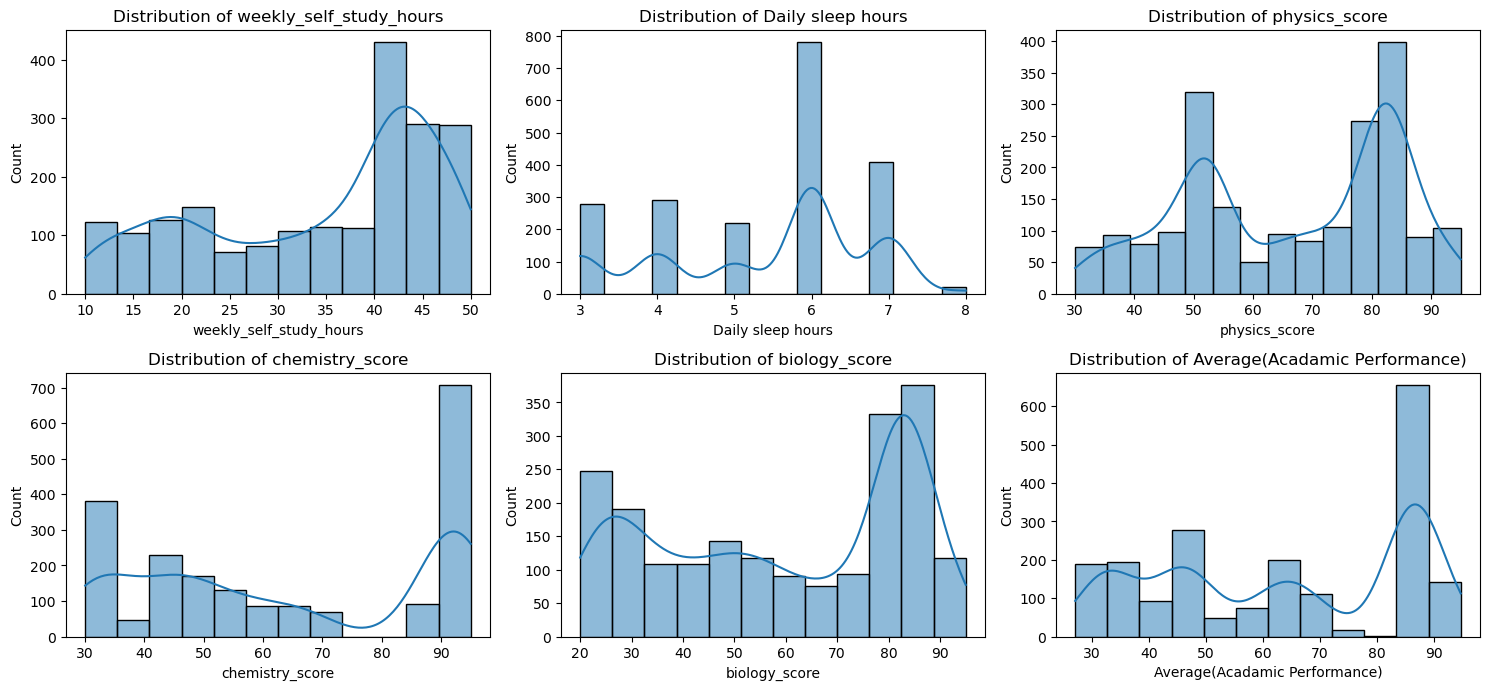

In [4]:
# Automatically select numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Visualizing numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [5]:
# Preprocessing: Convert categorical to numerical
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['extracurricular_activities'] = df['extracurricular_activities'].astype(int)

In [6]:
# Setting a threshold for high and low achievers based on the mean of academic performance
mean_academic_performance = df['Average(Acadamic Performance)'].mean()
df['Achievement'] = np.where(df['Average(Acadamic Performance)'] >= mean_academic_performance, 'High', 'Low')

In [7]:
df['achievement_binary'] = df['Achievement'].apply(lambda x: 1 if x in ['High'] else 0)

In [8]:
# Display the first 5 rows
print(df.head())

   gender  extracurricular_activities  weekly_self_study_hours  \
0       0                           0                       46   
1       0                           0                       21   
2       0                           1                       45   
3       1                           0                       17   
4       1                           1                       42   

   Daily sleep hours  physics_score  chemistry_score  biology_score  \
0                  7             85               93             84   
1                  4             51               47             35   
2                  6             72               59             59   
3                  3             30               30             21   
4                  6             63               55             50   

   Average(Acadamic Performance) Achievement  achievement_binary  
0                      87.333333        High                   1  
1                      44.333333         L

In [9]:
print(df.isnull().sum())

gender                           0
extracurricular_activities       0
weekly_self_study_hours          0
Daily sleep hours                0
physics_score                    0
chemistry_score                  0
biology_score                    0
Average(Acadamic Performance)    0
Achievement                      0
achievement_binary               0
dtype: int64


In [10]:
print(df.dtypes)

gender                             int64
extracurricular_activities         int32
weekly_self_study_hours            int64
Daily sleep hours                  int64
physics_score                      int64
chemistry_score                    int64
biology_score                      int64
Average(Acadamic Performance)    float64
Achievement                       object
achievement_binary                 int64
dtype: object


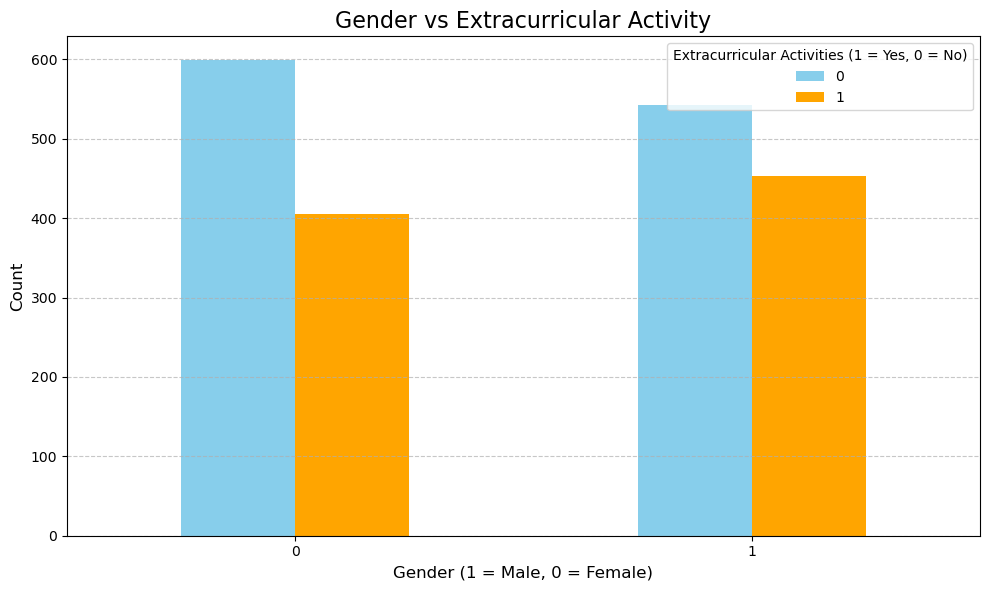

In [11]:
# Create a crosstab for counts of extracurricular activities by gender
crosstab = pd.crosstab(df['gender'], df['extracurricular_activities'])

# Plot a grouped bar chart
crosstab.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Gender vs Extracurricular Activity', fontsize=16)
plt.xlabel('Gender (1 = Male, 0 = Female)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Extracurricular Activities (1 = Yes, 0 = No)', fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Statistics for selected columns:
                                    Mean     Median       Mode
weekly_self_study_hours        34.576000  40.000000  41.000000
Daily sleep hours               5.409500   6.000000   6.000000
Average(Acadamic Performance)  63.537167  64.333333  85.666667


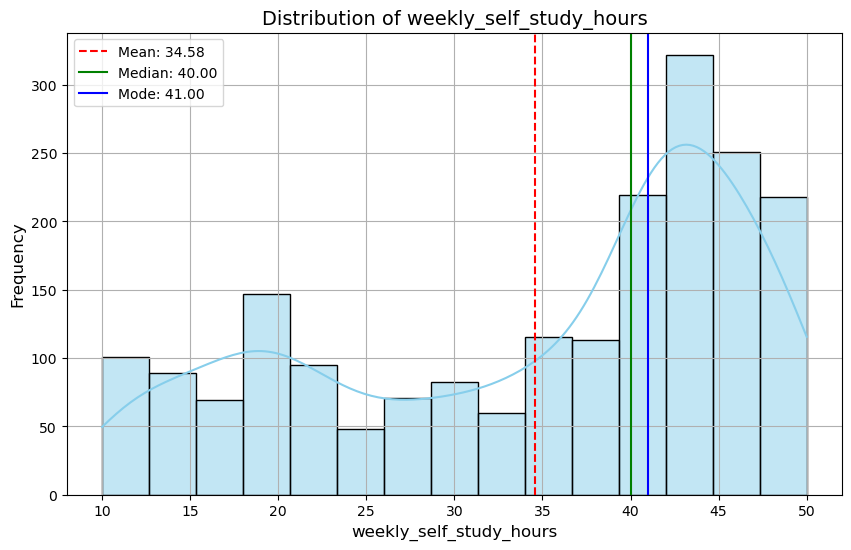

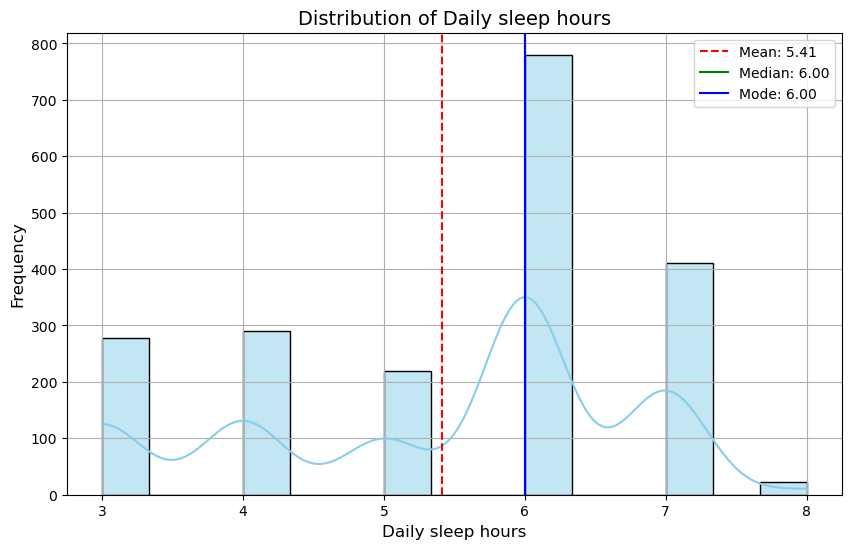

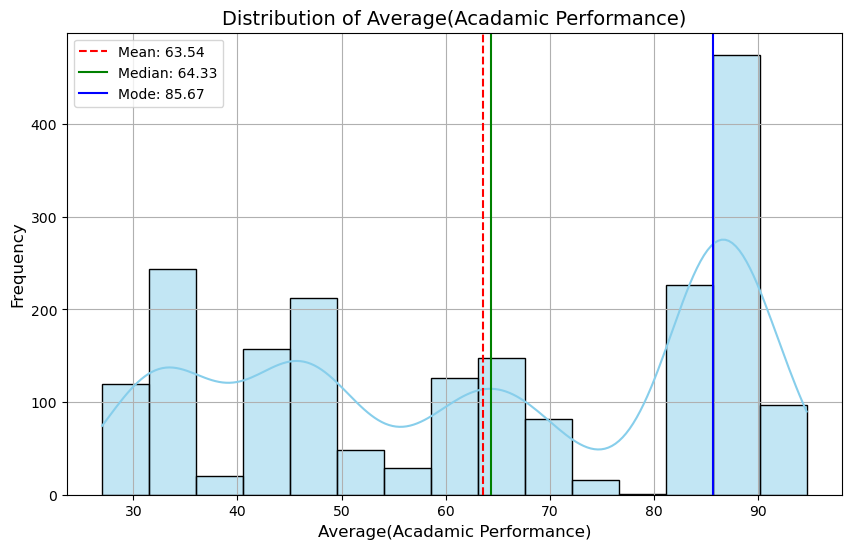

In [12]:
# Columns of interest
columns = ['weekly_self_study_hours', 'Daily sleep hours', 'Average(Acadamic Performance)']

# Calculate statistics for each column
statistics = {}
for column in columns:
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().iloc[0]
    statistics[column] = {'Mean': mean, 'Median': median, 'Mode': mode}

# Display the statistics
statistics_df = pd.DataFrame(statistics).T
print("Statistics for selected columns:")
print(statistics_df)

# Visualization for each column
for column in columns:
    plt.figure(figsize=(10, 6))
    
    # Histogram for distribution
    sns.histplot(df[column], kde=True, bins=15, color='skyblue', edgecolor='black')
    plt.axvline(df[column].mean(), color='red', linestyle='--', label=f"Mean: {df[column].mean():.2f}")
    plt.axvline(df[column].median(), color='green', linestyle='-', label=f"Median: {df[column].median():.2f}")
    plt.axvline(df[column].mode().iloc[0], color='blue', linestyle='-', label=f"Mode: {df[column].mode().iloc[0]:.2f}")
    
    # Labels and title
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


In [15]:
# Display the DataFrame to confirm the column is removed
print(df.head())

   gender  extracurricular_activities  weekly_self_study_hours  \
0       0                           0                       46   
1       0                           0                       21   
2       0                           1                       45   
3       1                           0                       17   
4       1                           1                       42   

   Daily sleep hours  physics_score  chemistry_score  biology_score  \
0                  7             85               93             84   
1                  4             51               47             35   
2                  6             72               59             59   
3                  3             30               30             21   
4                  6             63               55             50   

   Average(Acadamic Performance) Achievement  achievement_binary  
0                      87.333333        High                   1  
1                      44.333333         L

Independent Samples t-test Results:
Daily Sleep Hours: t-statistic = 54.990, p-value = 0.000
Weekly Self Study Hours: t-statistic = 58.157, p-value = 0.000


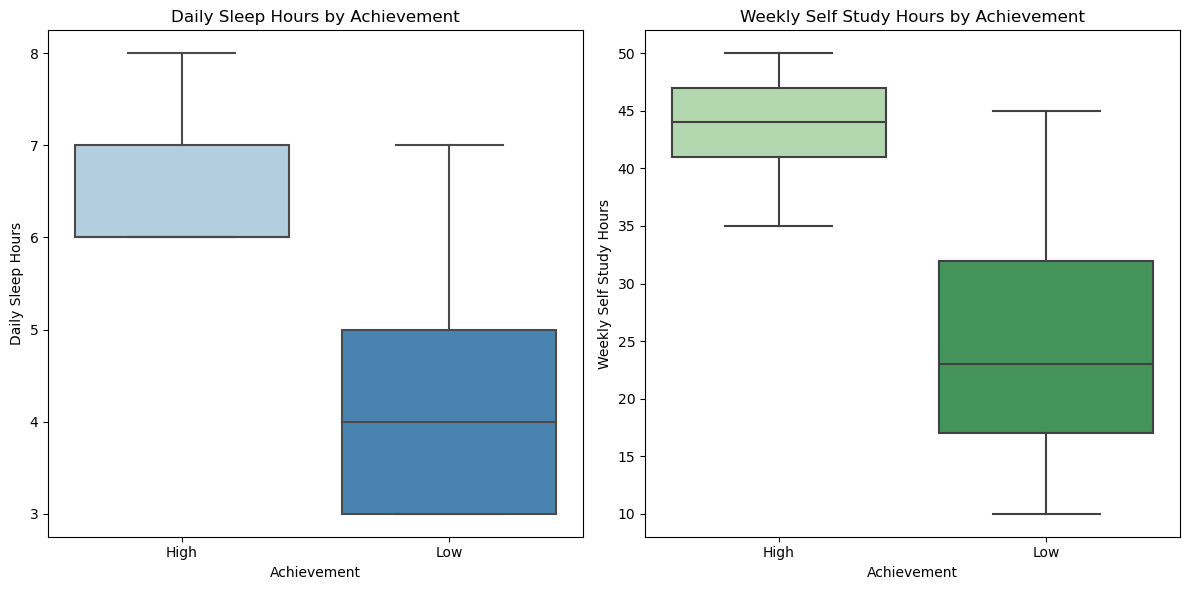

In [17]:
# Split the data into High Achievers and Low Achievers based on the Achievement column
high_achievers = df[df['Achievement'] == 'High']
low_achievers = df[df['Achievement'] == 'Low']

# Perform t-test for Daily Sleep Hours
sleep_ttest = ttest_ind(
    high_achievers['Daily sleep hours'], 
    low_achievers['Daily sleep hours'], 
    equal_var=False  # Welch's t-test for unequal variances
)

# Perform t-test for Weekly Self Study Hours
study_ttest = ttest_ind(
    high_achievers['weekly_self_study_hours'], 
    low_achievers['weekly_self_study_hours'], 
    equal_var=False
)

# Print the results
print("Independent Samples t-test Results:")
print(f"Daily Sleep Hours: t-statistic = {sleep_ttest.statistic:.3f}, p-value = {sleep_ttest.pvalue:.3f}")
print(f"Weekly Self Study Hours: t-statistic = {study_ttest.statistic:.3f}, p-value = {study_ttest.pvalue:.3f}")

# Visualize the data with boxplots
plt.figure(figsize=(12, 6))

# Boxplot for Daily Sleep Hours
plt.subplot(1, 2, 1)
sns.boxplot(x='Achievement', y='Daily sleep hours', data=df, palette='Blues')
plt.title("Daily Sleep Hours by Achievement")
plt.xlabel("Achievement")
plt.ylabel("Daily Sleep Hours")

# Boxplot for Weekly Self Study Hours
plt.subplot(1, 2, 2)
sns.boxplot(x='Achievement', y='weekly_self_study_hours', data=df, palette='Greens')
plt.title("Weekly Self Study Hours by Achievement")
plt.xlabel("Achievement")
plt.ylabel("Weekly Self Study Hours")

plt.tight_layout()
plt.show()


In [18]:
# Regression analysis
X_reg = df[['Daily sleep hours', 'weekly_self_study_hours', 'extracurricular_activities']]
y_reg = df['Average(Acadamic Performance)']
reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)
print("Regression Coefficients:", reg_model.coef_)

Regression Coefficients: [5.95564262 1.06000107 0.03929462]


Independent Samples t-test Results:
Daily Sleep Hours: t-statistic = 54.990, p-value = 0.000


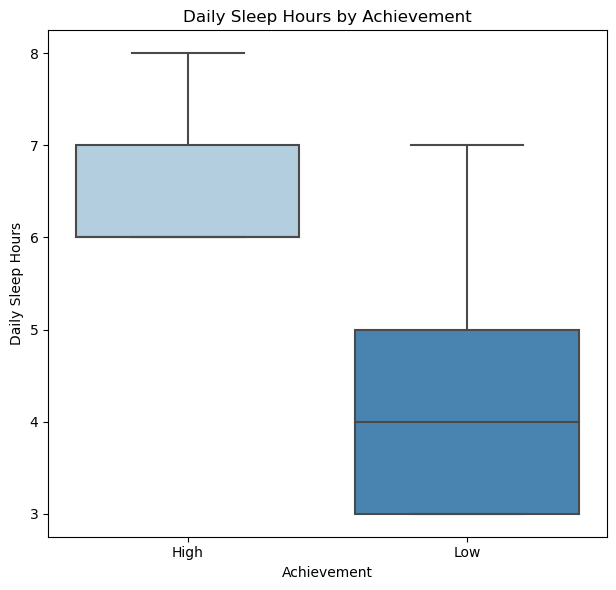

In [27]:
# Split the data into High Achievers and Low Achievers based on the Achievement column
high_achievers = df[df['Achievement'] == 'High']
low_achievers = df[df['Achievement'] == 'Low']

# Perform t-test for Daily Sleep Hours
sleep_ttest = ttest_ind(
    high_achievers['Daily sleep hours'], 
    low_achievers['Daily sleep hours'], 
    equal_var=False  # Welch's t-test for unequal variances
)

# Print the results
print("Independent Samples t-test Results:")
print(f"Daily Sleep Hours: t-statistic = {sleep_ttest.statistic:.3f}, p-value = {sleep_ttest.pvalue:.3f}")

# Visualize the data with boxplots
plt.figure(figsize=(12, 6))

# Boxplot for Daily Sleep Hours
plt.subplot(1, 2, 1)
sns.boxplot(x='Achievement', y='Daily sleep hours', data=df, palette='Blues')
plt.title("Daily Sleep Hours by Achievement")
plt.xlabel("Achievement")
plt.ylabel("Daily Sleep Hours")

plt.tight_layout()
plt.show()


Independent Samples t-test Results:
Weekly Self Study Hours: t-statistic = 58.157, p-value = 0.000


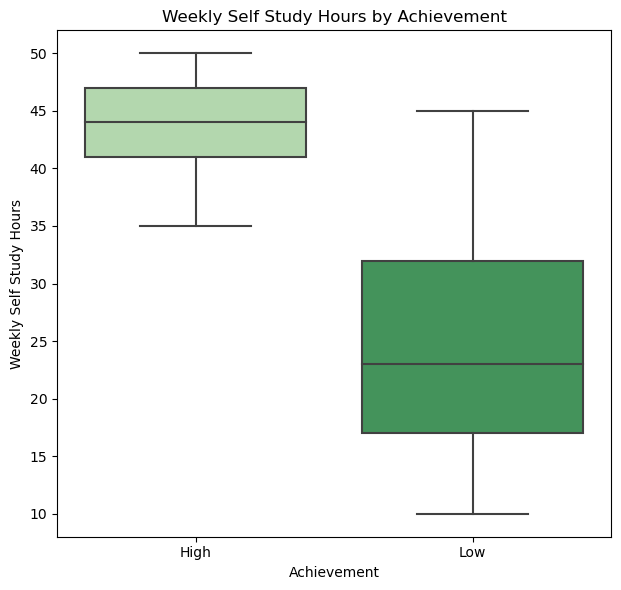

In [26]:
# Split the data into High Achievers and Low Achievers based on the Achievement column
high_achievers = df[df['Achievement'] == 'High']
low_achievers = df[df['Achievement'] == 'Low']


# Perform t-test for Weekly Self Study Hours
study_ttest = ttest_ind(
    high_achievers['weekly_self_study_hours'], 
    low_achievers['weekly_self_study_hours'], 
    equal_var=False
)

# Print the results
print("Independent Samples t-test Results:")
print(f"Weekly Self Study Hours: t-statistic = {study_ttest.statistic:.3f}, p-value = {study_ttest.pvalue:.3f}")

# Visualize the data with boxplots
plt.figure(figsize=(12, 6))

# Boxplot for Weekly Self Study Hours
plt.subplot(1, 2, 2)
sns.boxplot(x='Achievement', y='weekly_self_study_hours', data=df, palette='Greens')
plt.title("Weekly Self Study Hours by Achievement")
plt.xlabel("Achievement")
plt.ylabel("Weekly Self Study Hours")

plt.tight_layout()
plt.show()


In [21]:
# Display the DataFrame to confirm the column is removed
print(df.head())

   gender  extracurricular_activities  weekly_self_study_hours  \
0       0                           0                       46   
1       0                           0                       21   
2       0                           1                       45   
3       1                           0                       17   
4       1                           1                       42   

   Daily sleep hours  physics_score  chemistry_score  biology_score  \
0                  7             85               93             84   
1                  4             51               47             35   
2                  6             72               59             59   
3                  3             30               30             21   
4                  6             63               55             50   

   Average(Acadamic Performance) Achievement  achievement_binary  
0                      87.333333        High                   1  
1                      44.333333         L

In [22]:
# Independent variables (features)
X = df[['Daily sleep hours', 'weekly_self_study_hours',]]

# Dependent variable (target)
y = df['achievement_binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       186
           1       0.87      0.96      0.91       214

    accuracy                           0.90       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400


Confusion Matrix:
[[155  31]
 [  9 205]]


In [23]:
# Define X (independent variables) and y (dependent variable)
X = df[['Daily sleep hours', 'weekly_self_study_hours',]]
y = df['achievement_binary']  # Binary target: 1 for high achievers, 0 for low achievers

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
tree_predictions = tree_model.predict(X_test)

# Calculate accuracy
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, tree_predictions))

Decision Tree Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       186
           1       0.85      1.00      0.92       214

    accuracy                           0.91       400
   macro avg       0.93      0.90      0.90       400
weighted avg       0.92      0.91      0.91       400



In [24]:
# Save the trained Decision Tree model to a file
with open('decision_tree_model_final.pkl', 'wb') as file:
    pickle.dump(tree_model, file)

print("Decision Tree model has been saved to 'decision_tree_model.pkl'")


Decision Tree model has been saved to 'decision_tree_model.pkl'
